# Clustering in Data Analysis

Clustering is an unsupervised learning technique that groups similar data points together in a dataset based on certain features or attributes. The primary goal of clustering is to partition a set of data into subsets or clusters, where data points within the same cluster share more similarities with each other than with those in other clusters.

## Purpose of Clustering

Clustering aims to organize data points into clusters, ensuring that objects within the same cluster exhibit more similarities than those in different clusters. It serves several purposes:

- **Pattern Recognition:** Identifying natural groupings or structures within data, even without explicit labels.
- **Insight Generation:** Understanding relationships and associations among data points based on their attributes.
- **Data Preprocessing:** Reducing the dimensionality of large datasets or segmenting them for subsequent analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import load_iris

In [2]:
# Load the dataset
cities = pd.read_csv("worldcities.csv")
cities_summary = cities.describe()

# Normalize longitude and latitude
x = cities['lng'] / cities['lng'].max()
y = cities['lat'] / cities['lat'].max()

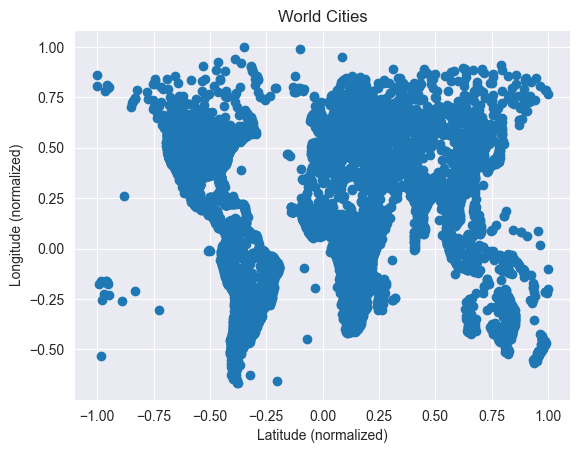

In [3]:
# Plot cities
plt.scatter(x, y)
plt.xlabel('Latitude (normalized)')
plt.ylabel('Longitude (normalized)')
plt.title('World Cities')
plt.show()

## K-Means Clustering

K-means clustering is an iterative algorithm used for partitioning datasets into K distinct, non-overlapping clusters:

1. **Initialization:** Randomly select K points (centroids) as initial cluster centers.
2. **Assignment:** Assign each data point to the nearest centroid, forming K clusters.
3. **Update centroids:** Recalculate centroids by taking the mean of points within each cluster.
4. **Repeat:** Iterate assignment and centroid update until convergence or a set number of iterations.

/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


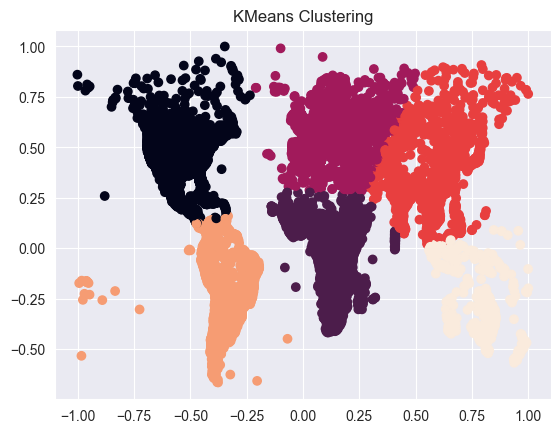

In [4]:
# KMeans clustering
df = pd.DataFrame({'x': x, 'y': y})
kmeans = KMeans(n_clusters=6)
results = kmeans.fit_predict(df)
plt.scatter(x, y, c=results)
plt.title('KMeans Clustering')
plt.show()

/Users/azagar/miniconda3/envs/is/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


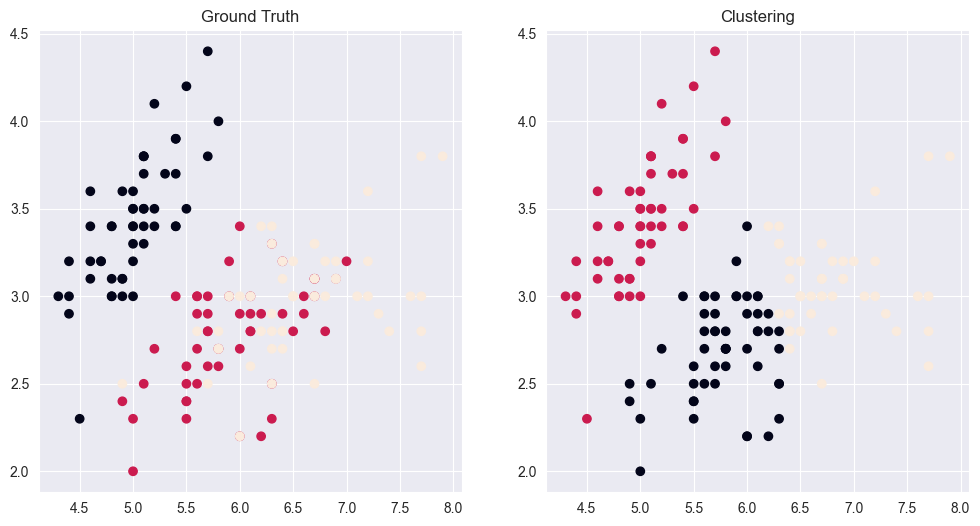

In [5]:
# Are clusters aligned with ground truth classes (using Iris dataset)?
iris = load_iris()
subset = pd.DataFrame(iris.data[:, :2], columns=iris.feature_names[:2])

# Plot ground truth and clustering results
results_iris = KMeans(n_clusters=3).fit_predict(subset)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1], c=iris.target)
plt.title('Ground Truth')

plt.subplot(122)
plt.scatter(subset.iloc[:, 0], subset.iloc[:, 1], c=results_iris)
plt.title('Clustering')
plt.show()

## Gaussian Mixture Models (GMMs)

1. **Probability Model:** Assumes that the data is generated from a mixture of several Gaussian distributions.
2. **Components:** Each cluster is represented by a Gaussian distribution (mean and covariance).
3. **Expectation-Maximization (EM):** The algorithm iterates through the E-step (expectation) and M-step (maximization).
   - E-step: Calculate the probability that each data point belongs to each Gaussian component.
   - M-step: Update parameters (mean, covariance, and weights) based on these probabilities.
4. **Soft Clustering:** Assigns probabilities to data points belonging to each cluster rather than hard assignments.
5. **Variance and Covariance:** Models complex cluster shapes and orientations better than K-means.

GMMs are effective for modeling data with multiple, overlapping clusters and provide a more nuanced understanding of cluster assignments.


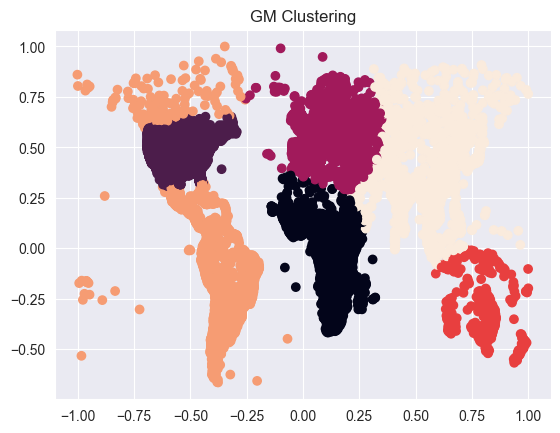

In [6]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=6, random_state=100).fit(df)
plt.scatter(x, y, c=gmm.predict(df))
plt.title('GM Clustering')
plt.show()

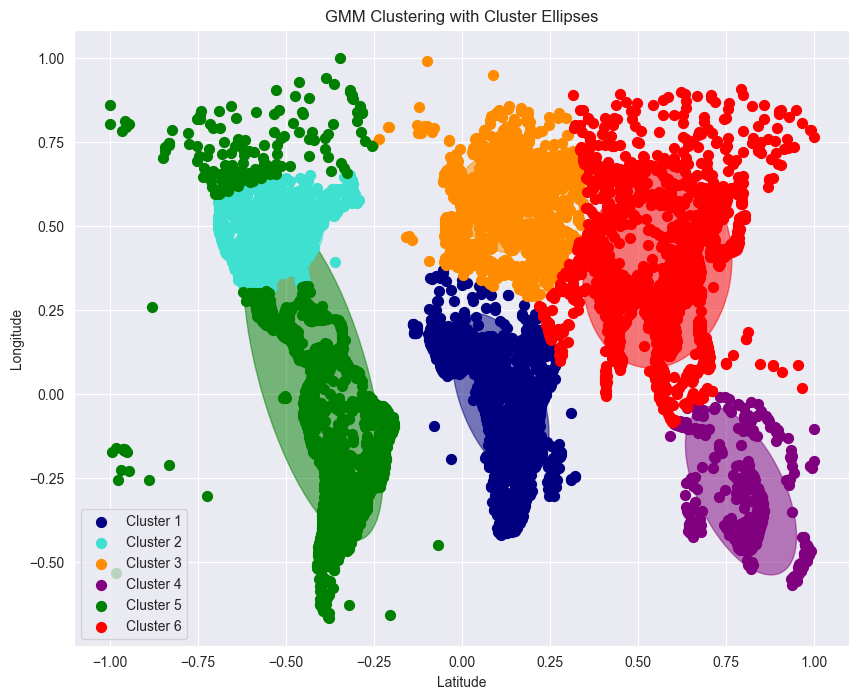

In [7]:
from matplotlib.patches import Ellipse

# Fit the model
gmm = GaussianMixture(n_components=6, random_state=100).fit(df)
labels = gmm.predict(df)

# Plot
plt.figure(figsize=(10, 8))
colors = ['navy', 'turquoise', 'darkorange', 'purple', 'green', 'red']

for i, (mean, covar, color) in enumerate(zip(gmm.means_, gmm.covariances_, colors)):
    v, w = np.linalg.eigh(covar)
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(u[1], u[0])
    angle = np.degrees(angle)  # convert to degrees
    ell = Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, color=color, alpha=0.5)

    plt.gca().add_artist(ell)

# Plot the data points
for i, color in enumerate(colors):
    data = df[labels == i]
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], s=50, color=color, label=f'Cluster {i+1}')

plt.title('GMM Clustering with Cluster Ellipses')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend(loc='best')
plt.grid(True)
plt.show()


## Hierarchical Clustering

Hierarchical clustering is a method used to cluster similar data points into groups or clusters in a tree-like or hierarchical structure. There are two types:

1. **Agglomerative Clustering:** It starts by considering each data point as a separate cluster. It then iteratively merges the closest clusters until all points belong to a single cluster.
   - **Linkage Criteria:** Defines the distance between clusters (single, complete, average, etc.).
   - **Dendrogram:** Visual representation of the merging process, showing the hierarchy of clusters.

2. **Divisive Clustering:** It begins with all data points in one cluster and divides them into smaller clusters in each iteration, ultimately resulting in single-point clusters.

### Key Aspects:

- **Hierarchy:** Offers insight into cluster relationships and subclusters at different similarity levels.
- **Choice of Cut-off:** Enables the selection of the number of clusters based on the dendrogram.

Hierarchical clustering is useful when the number of clusters is not known beforehand, providing insights into hierarchical structures and relationships within the dataset.


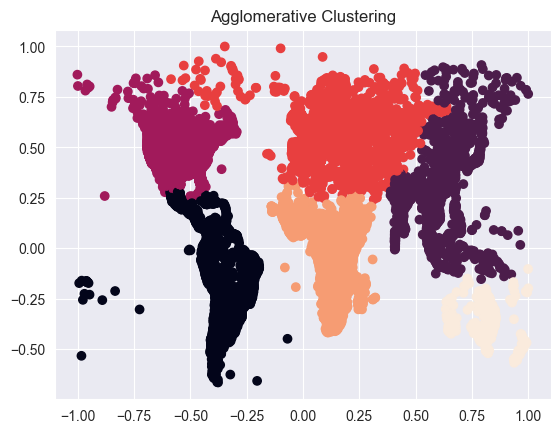

In [8]:
clusters = AgglomerativeClustering(n_clusters=6).fit_predict(df)
plt.scatter(x, y, c=clusters)
plt.title('Agglomerative Clustering')
plt.show()

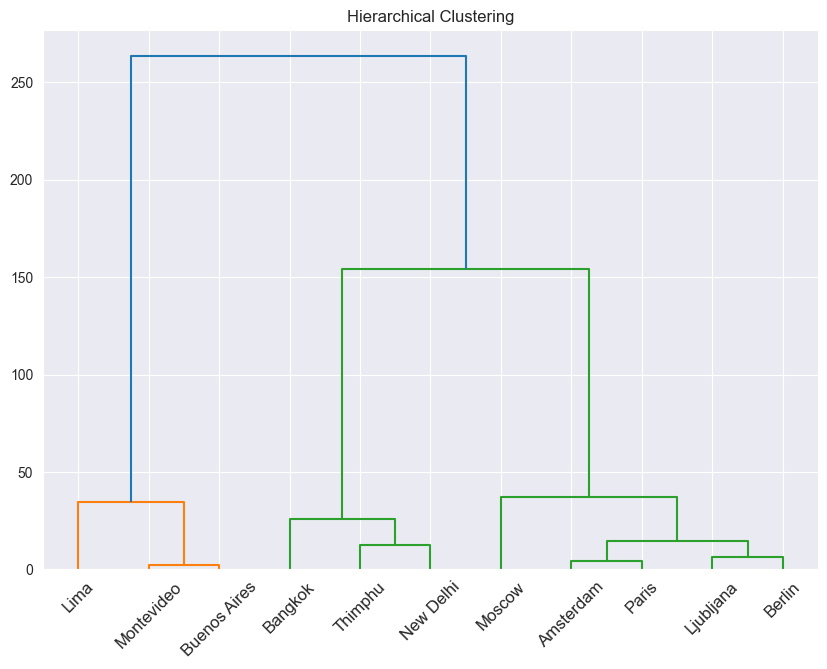

In [10]:
# Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram

subset = ['Amsterdam', 'Berlin', 'Ljubljana', 'Moscow', 'Paris', 'Lima', 'Buenos Aires', 'New Delhi', 'Thimphu', 'Bangkok', 'Montevideo']
subset_df = cities[(cities['city'].isin(subset)) & (cities['capital'] == 'primary')]
dist_mat = np.array(subset_df[['lat', 'lng']])
city_names = list(subset_df['city'])

linkage_matrix = linkage(dist_mat, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=city_names)
plt.title('Hierarchical Clustering')
plt.xticks(rotation=45)
plt.show()